## Loan Default Prediction

## In this project, we are creating machine learning model for Loan Default Prediction

###### Motivation
- Make the financial institution to make a decision to avoid the below risks:
    * Not approving a loan of a client who is likely to repay,results in a loss of business to the financial institition
    * Approving a loan of a client who is not likely to pay, i.e. he/she is likely to default, may lead to a financial loss for the institution
###### Dataset Description
- This specific dataset originates from Coursera's Loan Default Prediction Challenge.
- It offers an opportunity to practice and test machine learning skills on a real-world problem.
- The dataset comprises a significant amount of data, with 255,347 rows and 18 columns.
- The dataset contains information about past loan applicants and whether they defaulted or not.
- The <b>goal</b> is to identify the fields/attributes about an applicant which indicate if she is likely to default.
- The attributes will be fit to a machine learning algorithm to make a prediction for new data ad assit make the right decision when approving the loan,e.g.deny the loan,reduce loan amount,lend at higher rate for risky clients.





### Importing libraries

In [1]:
import numpy as np
import pandas as pd
#label encoding
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  BaggingClassifier, GradientBoostingClassifier,RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# load the data 
loan=pd.read_csv("Loan_default.csv")
# making copy of the dataset
loan_df=loan.copy()

### Exploratoty Data Analysis

In [3]:
loan_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
#info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
# get statistical information for the numerical values
loan_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [6]:
loan_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [7]:
#check if there are nulls
loan_df.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
#check for duplicates
loan_df.duplicated().sum()

0

### Visualizations

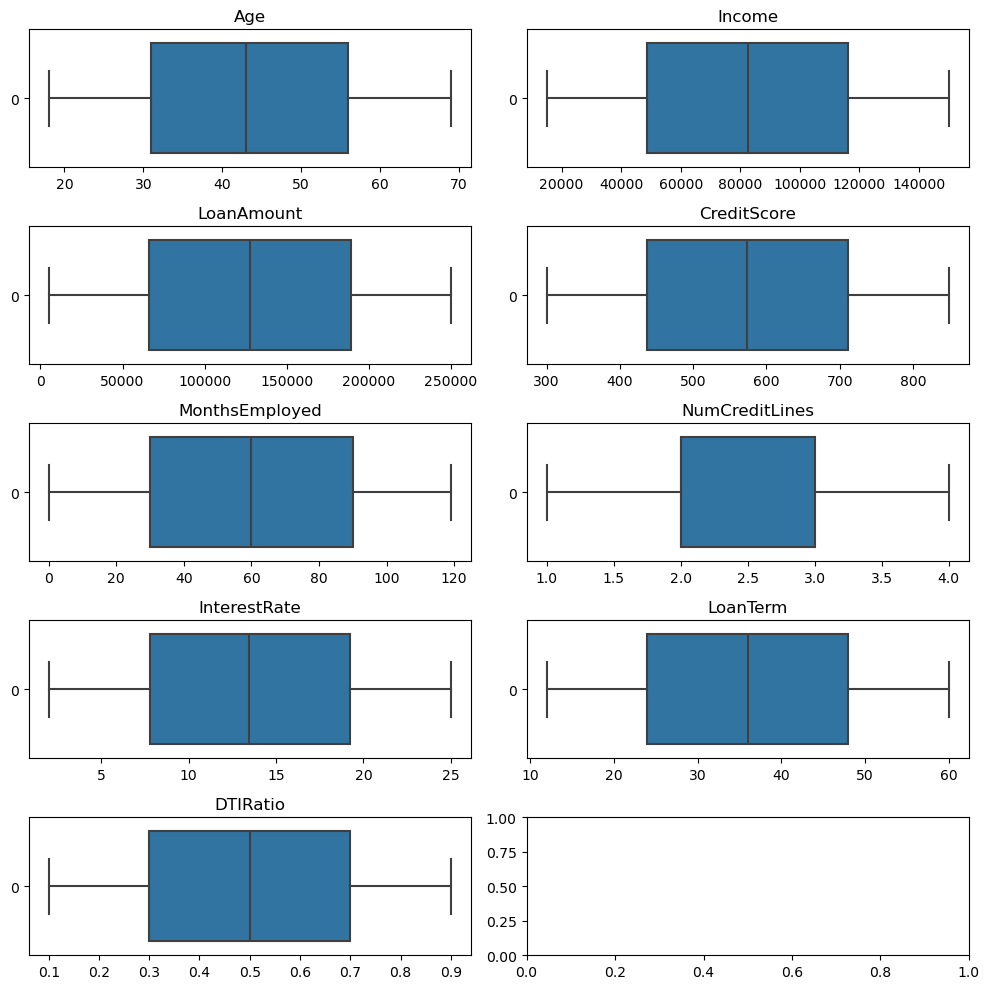

In [9]:
#plot the distribution of numerical values
columns = loan_df.columns
fig, axs = plt.subplots(5, 2, figsize=(10, 10))
sns.boxplot(loan_df.iloc[:,1],ax=axs[0, 0],orient='h').set_title(columns[1])
sns.boxplot(loan_df.iloc[:,2],ax=axs[0, 1],orient='h').set_title(columns[2])
sns.boxplot(loan_df.iloc[:,3],ax=axs[1, 0],orient='h').set_title(columns[3])
sns.boxplot(loan_df.iloc[:,4],ax=axs[1, 1],orient='h').set_title(columns[4])
sns.boxplot(loan_df.iloc[:,5],ax=axs[2, 0],orient='h').set_title(columns[5])
sns.boxplot(loan_df.iloc[:,6],ax=axs[2, 1],orient='h').set_title(columns[6])
sns.boxplot(loan_df.iloc[:,7],ax=axs[3, 0],orient='h').set_title(columns[7])
sns.boxplot(loan_df.iloc[:,8],ax=axs[3, 1],orient='h').set_title(columns[8])
sns.boxplot(loan_df.iloc[:,9],ax=axs[4, 0],orient='h').set_title(columns[9])
fig.tight_layout()

In [10]:
# Check if our observations from the visualizations are correct
np.round(loan_df.pivot_table(index='Default',values=['InterestRate','LoanAmount','NumCreditLines'],aggfunc=('mean','std')),2)

InterestRate       LoanAmount           NumCreditLines      
                mean   std       mean       std           mean   std
Default                                                             
0              13.18  6.61  125353.66  70708.10           2.49  1.12
1              15.90  6.32  144515.31  69547.82           2.59  1.12

In [11]:
# Check if our observations are correct
np.round(loan_df.pivot_table(index='Default',values=['Age','Income','MonthsEmployed'],aggfunc=('mean','std')),2)

Age           Income          MonthsEmployed       
          mean    std      mean      std           mean    std
Default                                                       
0        44.41  14.89  83899.17  38498.8          60.76  34.56
1        36.56  13.90  71844.72  40785.1          50.24  33.88

In [12]:
#default counts
CNT=loan_df['Default'].value_counts()
CNT

Default
0    225694
1     29653
Name: count, dtype: int64

Text(0.5, 1.0, 'The number of defaulters and non_defaulters')

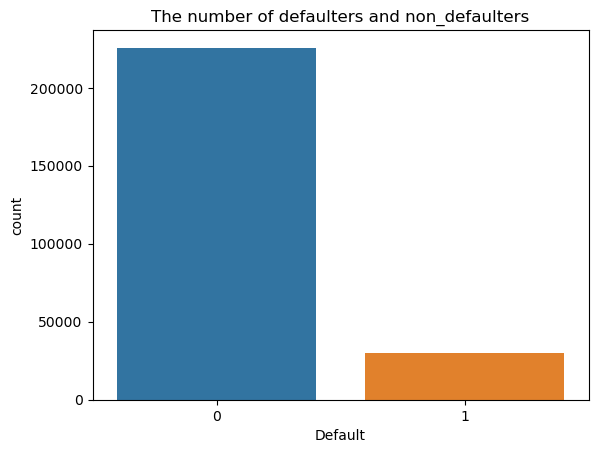

In [13]:
#bar plot of the number of defaulters and non_defaulters
sns.countplot(data=loan_df,x='Default')
plt.title('The number of defaulters and non_defaulters')

### Preprocessing

In [14]:
#Handling categorical values
#picking categorical columns and encoding them
categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

# Initializing LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical columns
for col in categorical_columns:
    loan_df[col] = label_encoder.fit_transform(loan_df[col])

In [15]:
#drop unnessary columns
load_df = loan_df.drop(['LoanID'],axis=1, inplace=True)
loan_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


### The dataset is imbalance hence downsampling

In [16]:
loan_df0 = loan_df[loan_df["Default"] == 0]
loan_df1  = loan_df[loan_df["Default"] == 1]
print(loan_df0.shape)
print(loan_df1.shape)

(225694, 17)
(29653, 17)


In [17]:
from sklearn.utils import resample
loan_df0_ds = resample(loan_df0,
             replace=True,
             n_samples=len(loan_df1),
             random_state=42)

print(loan_df0_ds.shape)

(29653, 17)


Default
0    29653
1    29653
Name: count, dtype: int64


<Axes: ylabel='Type'>

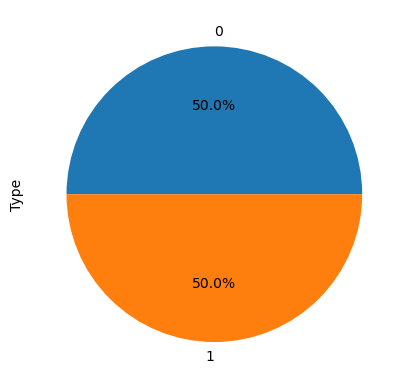

In [18]:
data_downsampled = pd.concat([loan_df0_ds, loan_df1])

print(data_downsampled["Default"].value_counts())

data_downsampled.groupby('Default').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

### Feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_downsampled.drop('Default', axis=1)), columns=data_downsampled.columns[:-1])
data_scaled.head(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,-0.502430,-1.087166,-0.914909,1.122836,-0.216213,1.305486,-1.406425,0.701972,-1.498192,1.379158,0.397810,1.222644,-0.971505,-0.959151,-0.695899,-0.956110
1,-0.904168,0.288620,-0.811069,1.103964,1.404180,-1.378003,1.512560,1.409805,0.888823,-1.315989,-1.395752,-1.200580,1.029331,-0.959151,1.421467,1.045905
2,1.573217,0.651875,0.796399,-0.135284,-0.071535,-0.483507,-1.339671,0.701972,-0.543386,0.480775,-0.498971,1.222644,-0.971505,-0.959151,0.009890,1.045905
3,0.100177,0.574495,-1.323781,-1.475181,0.507177,-0.483507,-0.414213,0.701972,-1.107590,1.379158,1.294591,1.222644,1.029331,-0.959151,1.421467,-0.956110
4,-0.234605,0.556234,0.921245,-0.399489,-0.621312,1.305486,-0.729779,-1.421525,-1.064189,-1.315989,1.294591,1.222644,-0.971505,-0.959151,0.009890,-0.956110


## Step 3: Split Data into Training and Testing Sets

In [20]:
# Split Dataset into train and test dataset
X = data_scaled
y = data_downsampled['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('x_train:',X_train.shape)
print('y_train:',y_train.shape)
print('x_test:',X_test.shape)
print('y_test:',y_test.shape)

x_train: (47444, 16)
y_train: (47444,)
x_test: (11862, 16)
y_test: (11862,)


### Train and Evaluate Models

In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Support Vector Machines": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forests": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name}: {model.score(X_test, y_test)}")

Logistic Regression: 0.6791434833923453
K-Nearest Neighbors: 0.6191198786039454
Decision Trees: 0.60900354071826
Random Forests: 0.6967627718765806


### Random Forest Classifier

In [22]:

rf_clf = RandomForestClassifier(n_estimators=100,  random_state=42)

# Train and evaluate:
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
random_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest accuracy:", random_accuracy)

Random Forest accuracy: 0.6951610183780138


### Decision Tree

In [23]:
dt_clf = DecisionTreeClassifier(random_state=42)

# Train and evaluate:
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree accuracy:", dt_accuracy)

Decision Tree accuracy: 0.6078233012982633


### Logistic Regression

In [24]:
lr_clf = LogisticRegression(random_state=42)

# Train and evaluate:
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print("Logistic regression accuracy:", lr_accuracy)

Logistic regression accuracy: 0.6791434833923453


### K-Nearest Neighbors

In [25]:
knn_clf = KNeighborsClassifier()
# Train and evaluate:
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbors accuracy:", knn_accuracy)

K-Nearest Neighbors accuracy: 0.6191198786039454


## ML models - Ensemble methods

#### Ensemble methods
* Bagging
* Boosting
* Stacking
* Voting

### Bagging Method

In [26]:
# Create a base classifier (e.g., DecisionTreeClassifier):
base_clf = DecisionTreeClassifier()

# Create the bagging classifier:
bagging_clf = BaggingClassifier(base_estimator=base_clf, n_estimators=100, random_state=42)

# Train and evaluate (similar to Voting):
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred)
print("Bagging accuracy:", bagging_accuracy)


C:\Users\Lenovo\anaconda3\envs\loan_default_prediction\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging accuracy: 0.6884167931208902


### Boosting method

In [27]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
boosting_accuracy = accuracy_score(y_test, y_pred)
print("Boosting accuracy:", boosting_accuracy)


Boosting accuracy: 0.6903557578823133


### stacking Method

In [28]:
# Define the base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]

# Define the meta-model
meta_model = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the performance
stack_accuracy = accuracy_score(y_test, stacking_predictions)
print(f'Accuracy of Stacking Classifier: {stack_accuracy}')

Accuracy of Stacking Classifier: 0.6986174338222897


## voting classifier

In [29]:

from sklearn.ensemble import VotingClassifier

# Create a list of tuples with (model_name, model_instance)
models = [ ( "Decision Tree", dt_clf), ("Random Forest",rf_clf), ( "Stacking", stacking_classifier), 
          ("Boosting", gb_clf),("Bagging", bagging_clf)]

# Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')  # 'hard' for majority voting


# Fit the Voting Classifier on the training data
voting_classifier.fit(X_train, y_train)

# Predictions
predictions = voting_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Ensemble Model Accuracy: {accuracy}')




C:\Users\Lenovo\anaconda3\envs\loan_default_prediction\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Ensemble Model Accuracy: 0.6977744056651493


In [30]:
# Create the bar chart
# Calculate and print accuracy
accuracy_ensemble = accuracy_score(y_test, predictions)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.6977744056651493


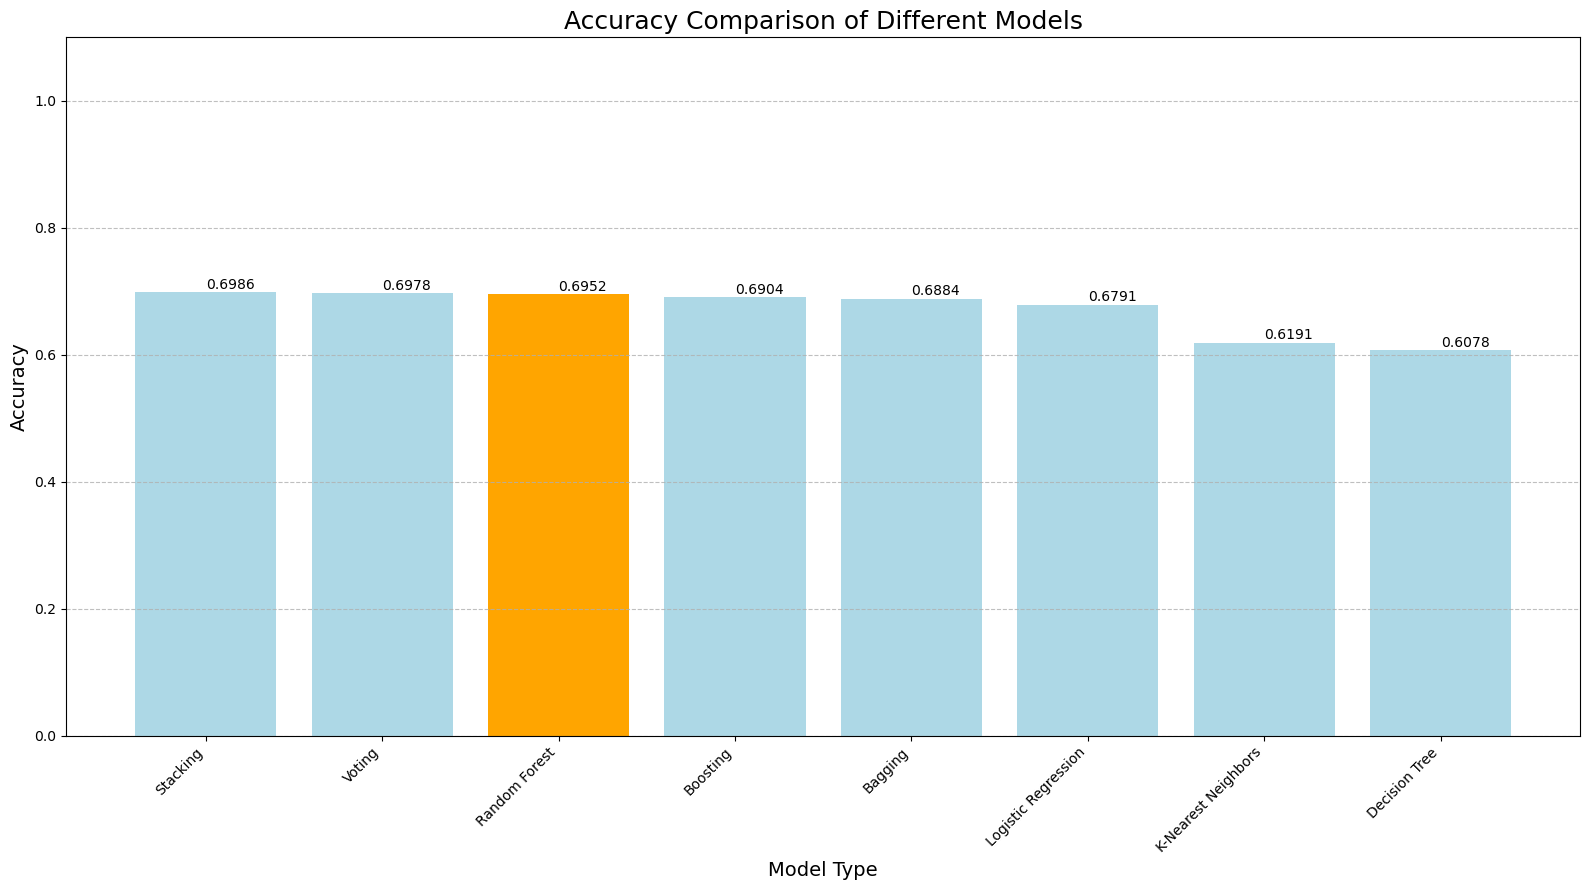

In [31]:
# Accuracy scores for different models
accuracies = {
    "Decision Tree": dt_accuracy,
    "Random Forest": random_accuracy,
#     "Support  Vector Machines": svc_accuracy,
    "Logistic Regression": lr_accuracy,
    "K-Nearest Neighbors": knn_accuracy,
    "Stacking": stack_accuracy,
    "Boosting": boosting_accuracy,
    "Bagging": bagging_accuracy,
    "Voting":accuracy_ensemble 
}


accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

# Create the bar chart
plt.figure(figsize=(16, 9))  # Adjust figure size as needed

colors = ['lightblue' if model != 'Random Forest' else 'orange' for model in accuracies.keys()]
plt.bar(accuracies.keys(), accuracies.values(), color=colors)
# Customize chart elements
plt.xlabel("Model Type", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy Comparison of Different Models", fontsize=18)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylim(0, 1.1)  # Set y-axis limits for precision

plt.grid(axis='y', linestyle='--', alpha=0.8)  # Add grid lines

# Annotate each bar with 8 decimal places
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.005, f"{v:.4f}")  # Format with 8 decimals

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### Model Tuning - Gradient boosting classifier

In [32]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")

Best model: RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=200)
Best score: 0.6943133297861356
CPU times: total: 1min 12s
Wall time: 43min 22s


### Feature_selection using  RFECV

In [33]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

# Instantiate the best model from Step 4 (e.g., Random Forests)
best_model = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=2)

# Create the RFECV object and fit it to the training data
selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(X_train, y_train)

# Get the selected features and their ranks
selected_features = X_train.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")

Selected features: Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')
Feature ranks: [1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1]
CPU times: total: 46min 24s
Wall time: 46min 54s


In [34]:
# Convert selected_features to a list
selected_features_list = selected_features.tolist()

# Remove target variable from the list of selected features if it's present
if 'Defaulted' in selected_features_list:
    selected_features_list.remove('Defaulted')

# Create new dataframes with only the selected features
X_train_selected = X_train[selected_features_list]
X_test_selected = X_test[selected_features_list]


### Train the model with   the list of selected features 

In [35]:
best_model=best_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model using accuracy_score
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with selected features: {test_accuracy}")

Test accuracy with selected features: 0.6934749620637329


### Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Calculate evaluation scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Print evaluation scores
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.6935
Precision: 0.7003
Recall: 0.6875
F1-score: 0.6938
AUC-ROC: 0.6935


### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

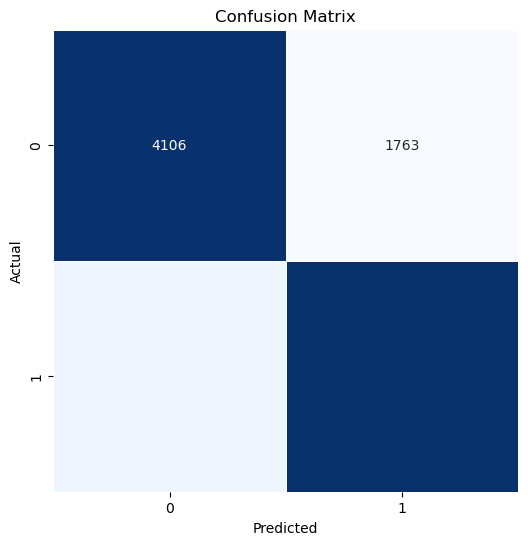

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


# Save the confusion matrix as an image

#plt.savefig('confusion_matrix.png')


### To save the best features list as json for future use 

In [38]:
import json
selected_features_list = selected_features.tolist()

with open("selected_features.json", "w") as f:
    json.dump(selected_features_list, f)

### Save the model

In [39]:
import joblib

# Save the best model to a file
joblib.dump(best_model, "best_model1.pkl")

['best_model1.pkl']

### Create Streamlit Web App

In [40]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = joblib.load("best_model1.pkl")

# Define the app title and layout
st.title("Loan Default Prediction App")

# Define input fields for features
credit_score = st.number_input("Credit Score", min_value=0, max_value=1000, value=600, step=1)
age = st.number_input("Age", min_value=18, max_value=100, value=30, step=1)
income = st.number_input("Income", min_value=0.0, max_value=300000.0, value=10000.0, step=100.0)
LoanAmount= st.number_input("Loan Amount", min_value=5000.0, max_value=250000.0, value=10000.0, step=100.0)
MonthsEmployed = st.number_input("Months Employed", min_value=0, max_value=360, value=1, step=1)
NumCreditLines=st.number_input("Number of Credit Lines",min_value=0,max_value=4,value=1,step=1)
InterestRate=st.number_input("Interest rate",min_value=0.0,max_value=25.0,value=1.0,step=1.0)
DTIRatio=st.number_input("DTI ratio",min_value=0.0,max_value=0.9,value=0.1,step=0.1)
LoanTerm=st.number_input("Loan Term", min_value=0, max_value=60, value=6, step=6)
HasMortgage = st.selectbox("Has Mortage", ["No","Yes"])
HasDependents = st.selectbox("Has Dependants", ["No","Yes"])
HasCoSigner = st.selectbox("Has Co-Signer",  ["No","Yes"])
LoanPurpose = st.selectbox("Loan Purpose",  ["Education", "Home", "Auto","Other"])
Education = st.selectbox("Education", ["Bachelor's", "High School", "Master's"])
EmploymentType = st.selectbox("Employment Type", ["Full-time", "Part-time", "self-employed","unemployed"])
MaritalStatus = st.selectbox("Marital Status", ["Married", "Single","Divorced"])

# Create a button for making predictions
if st.button("Predict"):
    # Process input values
    input_data = pd.DataFrame(
        {
            "CreditScore": [credit_score],
            "Age": [age],
            "Income": [income],
            "LoanAmount": [LoanAmount],
            "MonthsEmployed":[MonthsEmployed],
            "NumCreditLines": [NumCreditLines],
            "InterestRate": [InterestRate],
            "DTIRatio": [DTIRatio],
            "LoanTerm": [LoanTerm],
            "HasMortgage": [HasMortgage],
            "HasDependents": [HasDependents],
            "HasCoSigner": [HasCoSigner],
            "LoanPurpose": [LoanPurpose],
            "Education": [Education],
            "EmploymentType": [EmploymentType],
            "MaritalStatus": [MaritalStatus]
          
        }
    )

    #picking categorical columns and encoding them
    categorical_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']

    # Initializing LabelEncoder
    label_encoder = LabelEncoder()

    # Encoding categorical columns
    for col in categorical_columns:
        input_data[col] = label_encoder.fit_transform(input_data[col])

    # Scale input data using the same scaler used during training
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data)

    # Make a prediction using the trained model
    prediction = model.predict(input_data_scaled)

    # Display the prediction
    if prediction[0] == 1:
        st.success("The customer is at risk of defaulting.")
    else:
        st.success("The customer is not at risk of defaulting.")



2024-03-05 22:01:33.225 
  command:

    streamlit run C:\Users\Lenovo\anaconda3\envs\loan_default_prediction\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
